In [3]:
import pandas as pd

### Importing Data from Github

In [1]:
#taking the data from github directly using wget third party program, 
#"!" means the below command is a bash command
 
! wget https://github.com/sauravakhouri/Linear-Regression/raw/main/Boston%20Housing%20Linear%20Regression%20Model/BostonHousingData.csv

--2021-02-18 02:35:12--  https://github.com/sauravakhouri/Linear-Regression/raw/main/Boston%20Housing%20Linear%20Regression%20Model/BostonHousingData.csv
Resolving github.com (github.com)... 13.234.210.38
Connecting to github.com (github.com)|13.234.210.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sauravakhouri/Linear-Regression/main/Boston%20Housing%20Linear%20Regression%20Model/BostonHousingData.csv [following]
--2021-02-18 02:35:12--  https://raw.githubusercontent.com/sauravakhouri/Linear-Regression/main/Boston%20Housing%20Linear%20Regression%20Model/BostonHousingData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42981 (42K) [text/plain]
Saving to: 'BostonHousingData.csv.2'

    

#### Reading the imported data

In [4]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

#last variable is Y(dependent/target) while all others are x(independent/predictor) variables

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
#saving data on local machine if required
# BostonHousing.to_csv('BostonHousingData.csv')

### Splitting the Data to X and Y variables

In [6]:
Y=BostonHousing.medv
X=BostonHousing.drop(['medv'],axis=1)

In [7]:
X.shape, Y.shape

((506, 13), (506,))

### Data Split into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.70)

In [84]:
X_train.shape , Y_train.shape

((354, 13), (354,))

In [85]:
X_test.shape , Y_test.shape

((152, 13), (152,))

In [86]:
from sklearn import linear_model

In [87]:
model=linear_model.LinearRegression()

In [88]:
model.fit(X_train,Y_train)

LinearRegression()

In [89]:
Y_pred=model.predict(X_test)

In [90]:
print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_)

Intercept:  37.52553296024777
Coefficient:  [-1.26676033e-01  5.38833531e-02  2.42623984e-02  4.17745466e+00
 -1.95759615e+01  3.73961551e+00 -9.16553080e-03 -1.79338327e+00
  2.70412120e-01 -9.45282361e-03 -8.78890044e-01  9.70172935e-03
 -5.44882394e-01]


In [91]:
from sklearn.metrics import r2_score,mean_squared_error

In [92]:
print('Mean Squared Error:  %.2f' % mean_squared_error(Y_test,Y_pred))

print('R square:  %.2f' % r2_score(Y_test,Y_pred))

Mean Squared Error:  20.39
R square:  0.73


In [93]:
R2_Score=r2_score(Y_test,Y_pred)
p=13
n=102
Adj_R2 = 1-(1-R2_Score)*(n-1)/(n-p-1)
print('Adjusted R Square: %.2f' % Adj_R2)

Adjusted R Square: 0.69


In [94]:
import seaborn as sns

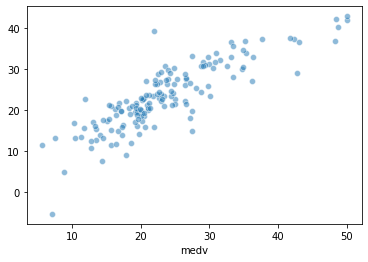

In [95]:
sns.scatterplot(Y_test,Y_pred,alpha=0.5)